In [13]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

In [14]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


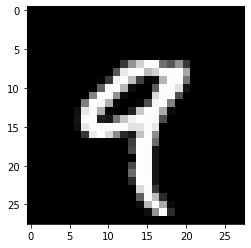

Label of this image is 9


In [15]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4], cmap='gray')
plt.show()
print("Label of this image is",ytrain[4])

In [16]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28, 1)).astype('float32')/255.0
xtest=np.reshape(xtest,(-1,28,28,1)).astype('float32')/255.0
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [17]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [18]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)


In [19]:
#importing the model
from keras.models import Sequential

In [20]:
#creating model object
model=Sequential()

In [21]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [22]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [23]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [24]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Epoch 1/5
600/600 [==============================] - 49s 81ms/step - loss: 0.7285 - accuracy: 0.7635 - val_loss: 0.2385 - val_accuracy: 0.9272
Epoch 2/5
600/600 [==============================] - 49s 82ms/step - loss: 0.2031 - accuracy: 0.9378 - val_loss: 0.1298 - val_accuracy: 0.9595
Epoch 3/5
600/600 [==============================] - 45s 74ms/step - loss: 0.1317 - accuracy: 0.9594 - val_loss: 0.0996 - val_accuracy: 0.9675
Epoch 4/5
600/600 [==============================] - 48s 81ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0744 - val_accuracy: 0.9744
Epoch 5/5
600/600 [==============================] - 50s 83ms/step - loss: 0.0819 - accuracy: 0.9744 - val_loss: 0.0630 - val_accuracy: 0.9782


In [25]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0630 - accuracy: 0.9782


([0.06275475025177002, 0.9803166389465332],
 [0.06295481324195862, 0.9782000184059143])

In [26]:
y_train.shape

(60000, 10)